In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [4]:
df_aggressive= pd.read_csv(r"C:\Users\Asus\Desktop\3. Aggressive_All.csv")
df_aggressive.head()

,No.,Message
0,1,zhha Islam does nothing but freeze the status ...
1,2,You dont get out much do you
2,3,MaxBlumenthal Campagnebds Blumenthal self prom...
3,4,No silly it isnt ITS UR MOMS and might I say q...
4,5,Yes there is even more rape in Muslim countrie...


In [5]:
df_not_aggressive= pd.read_csv(r"C:\Users\Asus\Desktop\4. Non_Aggressive_All.csv")
df_not_aggressive.head()

,No.,Message
0,1,Libya casualty report French operations You ...
1,2,Just for the record that IP is blocked for ho...
2,3,Big Brother Australia I see you have partial...
3,4,WikipediaFeatured portal candidatesPortalOrgan...
4,5,wiki cant edit could you make Thai airways s...


In [6]:
df_aggressive.isnull().sum().any()

np.True_

In [7]:
df_aggressive.isnull().sum()

No.         0
Message    21
dtype: int64

In [8]:
df_not_aggressive.isnull().sum()

No.         0
Message    50
dtype: int64

In [9]:
df_aggressive_clean=df_aggressive.dropna()

In [10]:
df_aggressive_clean.isnull().sum().any()


np.False_

In [11]:
df_not_aggressive_clean=df_not_aggressive.dropna()
df_not_aggressive_clean.isnull().sum().any()

np.False_

In [12]:
df_aggressive_clean = df_aggressive_clean.drop(columns=['No.'])


In [13]:
df_not_aggressive_clean = df_not_aggressive_clean.drop(columns=['No.'])

In [14]:
df_aggressive_clean.head(),df_not_aggressive_clean.head()

(                                             Message
 0  zhha Islam does nothing but freeze the status ...
 1                       You dont get out much do you
 2  MaxBlumenthal Campagnebds Blumenthal self prom...
 3  No silly it isnt ITS UR MOMS and might I say q...
 4  Yes there is even more rape in Muslim countrie...,
                                              Message
 0  Libya casualty report French operations   You ...
 1  Just for the record that IP is blocked for  ho...
 2  Big Brother Australia   I see you have partial...
 3  WikipediaFeatured portal candidatesPortalOrgan...
 4  wiki cant edit   could you make Thai airways s...)

In [15]:
print(df_aggressive_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 118807 entries, 0 to 118827
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Message  118807 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB
None


In [16]:
print(df_not_aggressive_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 118778 entries, 0 to 118827
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Message  118778 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB
None


In [17]:
df_aggressive_clean["Label"] = 1  # Cyberbullying
df_not_aggressive_clean["Label"] = 0  # Safe

In [18]:
df_combined = pd.concat([df_aggressive_clean, df_not_aggressive_clean], ignore_index=True)

In [19]:
df_combined.head(),df_combined.tail()

(                                             Message  Label
 0  zhha Islam does nothing but freeze the status ...      1
 1                       You dont get out much do you      1
 2  MaxBlumenthal Campagnebds Blumenthal self prom...      1
 3  No silly it isnt ITS UR MOMS and might I say q...      1
 4  Yes there is even more rape in Muslim countrie...      1,
                                                   Message  Label
 237580  VANDALIZER   Hi this is your official warning ...      0
 237581                              Its kinda both really      0
 237582  This is very nonnotable as related to the arch...      0
 237583              no i just randomly made up some pairs      0
 237584  The use of calcio instead of football in Italy...      0)

In [20]:
print(df_combined["Label"].value_counts())


Label
1    118807
0    118778
Name: count, dtype: int64


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [22]:
vectorizer = TfidfVectorizer(max_features=8000) 

In [23]:
X_tfidf = vectorizer.fit_transform(df_combined["Message"])  # Features (TF-IDF)
y = df_combined["Label"]  # Labels (0 = Safe, 1 = Cyberbullying)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [25]:
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (190068, 8000) (190068,)
Testing Data Shape: (47517, 8000) (47517,)


In [26]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: {cm}")

Model Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88     23882
           1       0.89      0.86      0.87     23635

    accuracy                           0.87     47517
   macro avg       0.87      0.87      0.87     47517
weighted avg       0.87      0.87      0.87     47517

Confusion matrix: [[21267  2615]
 [ 3364 20271]]


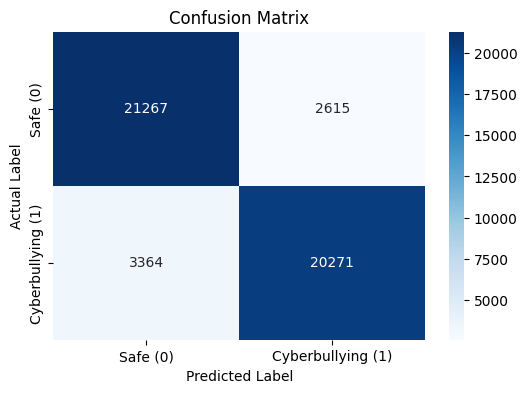

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Safe (0)", "Cyberbullying (1)"], yticklabels=["Safe (0)", "Cyberbullying (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg']  # Different solvers
}

In [33]:
logistic = LogisticRegression()

In [34]:
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga', 'newton-cg']},
             scoring='accuracy', verbose=2)

In [35]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 10, 'solver': 'saga'}
Best Accuracy: 0.88


In [36]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Improved Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
print(f"Improved confution matrix: {cm}")


Improved Model Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     23882
           1       0.88      0.87      0.88     23635

    accuracy                           0.88     47517
   macro avg       0.88      0.88      0.88     47517
weighted avg       0.88      0.88      0.88     47517

Improved confution matrix: [[21192  2690]
 [ 3088 20547]]


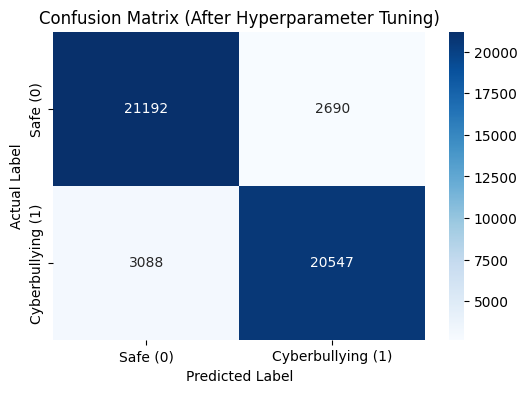

In [38]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Safe (0)", "Cyberbullying (1)"], yticklabels=["Safe (0)", "Cyberbullying (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (After Hyperparameter Tuning)")
plt.show()

In [39]:
def predict_message(message, best_model, vectorizer):
    message_tfidf = vectorizer.transform([message])  # Convert input text to TF-IDF
    prediction = best_model.predict(message_tfidf)[0]  # Predict class (0 or 1)
    return "Cyberbullying" if prediction == 1 else "Safe"

In [41]:

user_input = input("Enter a message to test: ")

print("Prediction:", predict_message(user_input, best_model, vectorizer))

Prediction: Safe


In [44]:
import pickle

In [47]:
with open("cyberbullying_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [48]:
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [49]:
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
